In [1]:
!pip install qiskit
!pip install qiskit.ignis
!pip install pylatexenc

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from qiskit import *
from qiskit.tools.monitor import job_monitor
from qiskit.tools.visualization import plot_state_qsphere
from qiskit.visualization import plot_histogram, plot_bloch_multivector, array_to_latex
from math import sqrt,pi


#Question-1

#Initialize the circuit

In [3]:
#create circuit
circuit = QuantumCircuit(1, 1)

#define state
custom_state = [1/sqrt(2), 1j/sqrt(2)]

#assign custom state
circuit.initialize(custom_state, 0)


#Measure in Y basis

I have used hadamard gate on the quantum bit to make the superposition of the qubit. Virtually superposition states are created to the negative of the y axis. So later I have used x(0) gate to change the phase of qubit by π(pi) radian. This is done before the measurement on x-axis.

In [4]:
#apply hadamard gate
circuit.h(0)

#apply x gate
circuit.x(0)

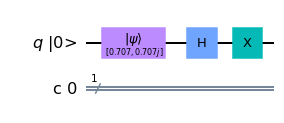

In [5]:
#draw circuit
circuit.draw(initial_state=True, output='mpl')

#Run on simulator

In [6]:
#select simulator
simulator = Aer.get_backend('aer_simulator')

#save statevectr
circuit.save_statevector()

#assemble
qobj = assemble(circuit)

#run
job = simulator.run(circuit)

#job monitor
job_monitor(job)

#get result
result = job.result()

Job Status: job has successfully run


#Statevector output

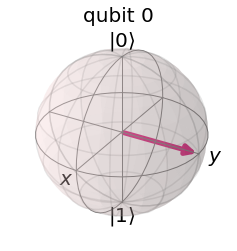

In [7]:
#get statevector
final_state = result.get_statevector()

#plot statevector
plot_bloch_multivector(final_state)


#Again same circuit

In [8]:
#create circuit
circuit = QuantumCircuit(1, 1)

#define state
custom_state = [1/sqrt(2), 1j/sqrt(2)]

#assign custom state
circuit.initialize(custom_state, 0)


#Measure in X basis

I have used Sdg or S-dagger gate on the current state. S-dagger gate changes the phase of the qubit by -π(pi)/2 radian. So now I have got the measurement on x asis before the measurement.

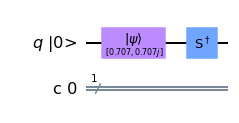

In [9]:
#apply gate
circuit.sdg(0)

#draw circuit
circuit.draw(initial_state=True, output='mpl')

#Run on simulator

In [10]:
#select simulator
simulator = Aer.get_backend('aer_simulator')

#save statevectr
circuit.save_statevector()

#assemble
qobj = assemble(circuit)

#run
job = simulator.run(circuit)

#job monitor
job_monitor(job)

#get result
result = job.result()

Job Status: job has successfully run


#Statevector output

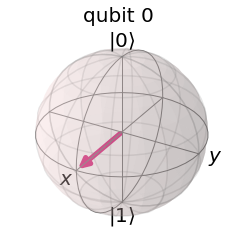

In [11]:
#get statevector
final_state = result.get_statevector()

#plot statevector
plot_bloch_multivector(final_state)


#Circuit for Unitary representation

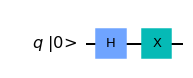

In [12]:
#create circuit
circuit = QuantumCircuit(1)

#define state
custom_state = [1/sqrt(2), 1j/sqrt(2)]

#assign custom state
#circuit.initialize(custom_state, 0)

#apply hadamard gate
circuit.h(0)

#apply x gate
circuit.x(0)

#draw circuit
circuit.draw(initial_state=True, output='mpl')

#Run on simulator for Unitary representation

In [13]:
#select simulator
simulator = Aer.get_backend('aer_simulator')

#save statevectr
circuit.save_unitary()

#assemble
qobj = assemble(circuit)

#run
job = simulator.run(circuit)

#job monitor
job_monitor(job)

#get result
result = job.result()


Job Status: job has successfully run


#Unitary Matrix

Unitary matrix gives the dot product between two gates which are hadamard gate and x gate. In quantum computing unitary matrices are very important as they describe how quantum logic gates and circuits affect qubit states. 

In [14]:
#get unitary
unitary = result.get_unitary()

#print
print(unitary)

array_to_latex(unitary)

Operator([[ 0.70710678+0.00000000e+00j, -0.70710678+8.65956056e-17j],
          [ 0.70710678+0.00000000e+00j,  0.70710678-8.65956056e-17j]],
         input_dims=(2,), output_dims=(2,))


<IPython.core.display.Latex object>

This procedure represents the quantum superposition theory of quantum mechanics. Qiskit by default measure the qubit in Z axis but that is after measurement. Here Hadamard gate is used to create the superpositions of the qubit. Later pauli's x gate is used to change the phase of the qubit. Pauli's x gate rotates the quantum state by π radians. All these are done before the measurements because superpositions are only aplicable before the measurements.

#Question-2

#3 qubit circuit

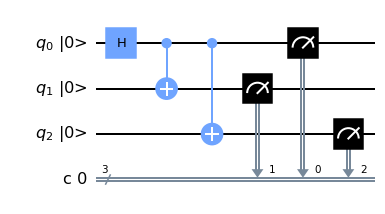

In [15]:
#create circuit
circuit = QuantumCircuit(3, 3)

#apply gate
circuit.h(0)

circuit.cx(0,1)
circuit.cx(0,2)

#apply measurement
circuit.measure([0,1,2],[0,1,2])

#draw circuit
circuit.draw(initial_state=True, output='mpl')

#Run on Simulator

In [16]:
#select simulator
simulator = Aer.get_backend('aer_simulator')

#save statevectr
circuit.save_statevector()

#assemble
qobj = assemble(circuit)

#run
job = simulator.run(circuit)

#job monitor
job_monitor(job)

#get result
result = job.result()

Job Status: job has successfully run


#Count

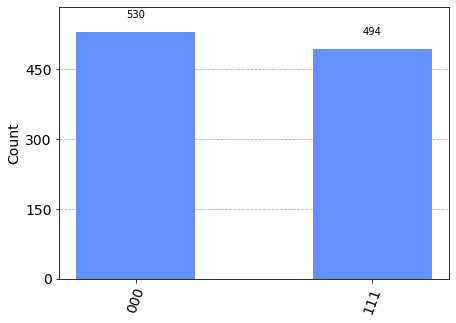

In [17]:
#get counts
counts = result.get_counts()

#plot
plot_histogram(counts)

#Bloch Sphere

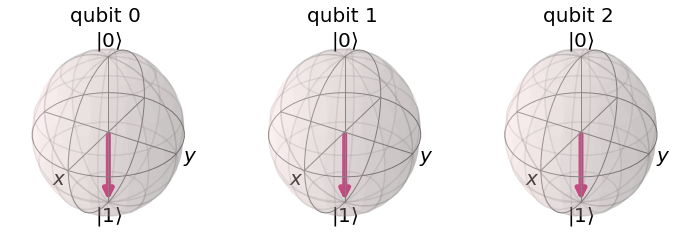

In [18]:
#get statevector
final_state = result.get_statevector()

#plot statevector
plot_bloch_multivector(final_state)

#Measurement error mitigation

In [19]:
from qiskit import *
from qiskit.providers.aer.noise import NoiseModel
from qiskit.providers.aer.noise.errors import pauli_error

#Noise model Function

In [20]:
def get_noise(p):
  error_measure = pauli_error([('X', p), ('I', 1-p)])

  noise_model = NoiseModel()

  #apply measurement error to noise model
  noise_model.add_all_qubit_quantum_error(error_measure, 'measure')

  return noise_model

#Create noise model

In [21]:
#1% chance of happening measurement error
noise_model = get_noise(0.01)

#Effect of Noise Model

#000 001 010 011 100 101 110 111

In [22]:
all_state = ['000', '001', '010', '011', '100', '101', '110', '111' ]

for state in all_state:
  qc =QuantumCircuit(3,3)

  if state[0] == '1':
    qc.x(2)
  if state[1] == '1':
    qc.x(1)
  if state[2] == '1':
    qc.x(0)

  qc.measure([0,1,2], [0,1,2])

  simulator = Aer.get_backend('aer_simulator')
  t_tc = transpile(qc, simulator)
  qobj = assemble(t_tc, shots=10000)
  counts = simulator.run(qobj, noise_model=None).result().get_counts()
  print(state + ' becomes', counts)

000 becomes {'000': 10000}
001 becomes {'001': 10000}
010 becomes {'010': 10000}
011 becomes {'011': 10000}
100 becomes {'100': 10000}
101 becomes {'101': 10000}
110 becomes {'110': 10000}
111 becomes {'111': 10000}


#Run with noise

In [23]:
all_state = ['000', '001', '010', '011', '100', '101', '110', '111' ]

for state in all_state:
  qc = QuantumCircuit(3,3)

  if state[0] == '1':
    qc.x(2)
  if state[1] == '1':
    qc.x(1)
  if state[2] == '1':
    qc.x(0)

  qc.measure([0,1,2], [0,1,2])

  simulator = Aer.get_backend('aer_simulator')           
  t_tc = transpile(qc, simulator)
  qobj = assemble(t_tc, shots=10000)
  counts = simulator.run(qobj, noise_model=noise_model).result().get_counts()
  print(state + ' becomes', counts)

000 becomes {'011': 2, '100': 89, '001': 95, '110': 1, '000': 9704, '010': 109}
001 becomes {'010': 1, '001': 9666, '101': 121, '100': 4, '000': 107, '011': 99, '111': 2}
010 becomes {'001': 1, '011': 119, '000': 106, '010': 9657, '110': 117}
011 becomes {'111': 114, '000': 1, '110': 3, '010': 99, '011': 9681, '001': 102}
100 becomes {'111': 1, '101': 108, '100': 9694, '010': 1, '110': 104, '000': 92}
101 becomes {'011': 1, '111': 125, '100': 104, '101': 9673, '001': 97}
110 becomes {'101': 2, '010': 103, '110': 9694, '100': 98, '000': 1, '111': 101, '011': 1}
111 becomes {'110': 112, '011': 101, '111': 9692, '101': 95}


#Create General State

In [24]:
#create circuit
qc = QuantumCircuit(3,3)

#apply gates
qc.h(0)
qc.cx(0, 1)
qc.cx(0, 2)
#apply measurement
qc.measure([0,1,2], [0,1,2])


t_tc = transpile(qc, simulator)
qobj = assemble(t_tc, shots=10000)
counts = simulator.run(qobj, noise_model=noise_model).result().get_counts()
print(counts)

{'101': 58, '010': 50, '100': 38, '110': 52, '111': 4778, '000': 4910, '011': 55, '001': 59}


#Error mitigation in qiskit


In [25]:
#import libraries

from qiskit import *
from qiskit.visualization import array_to_latex
from qiskit.ignis.mitigation.measurement import complete_meas_cal, CompleteMeasFitter
from qiskit.visualization import plot_histogram

<ipython-input-25-8ed08109f493>:5: DeprecationWarning: The qiskit.ignis package is deprecated and has been supersceded by the qiskit-experiments project. Refer to the migration guide: https://github.com/Qiskit/qiskit-ignis#migration-guide on how to migrate to the new project.
  from qiskit.ignis.mitigation.measurement import complete_meas_cal, CompleteMeasFitter


#Creating calibration circuit

In [26]:
qr = QuantumRegister(3)
meas_calibs, state_labels = complete_meas_cal(qr=qr, circlabel='mcal')

#Visualize calibration circuits

In [27]:
for circuit in meas_calibs:
  print('Circuit', circuit.name)
  print(circuit)
  print()

Circuit mcalcal_000
        ░ ┌─┐      
q33_0: ─░─┤M├──────
        ░ └╥┘┌─┐   
q33_1: ─░──╫─┤M├───
        ░  ║ └╥┘┌─┐
q33_2: ─░──╫──╫─┤M├
        ░  ║  ║ └╥┘
 c0: 3/════╩══╩══╩═
           0  1  2 

Circuit mcalcal_001
       ┌───┐ ░ ┌─┐      
q33_0: ┤ X ├─░─┤M├──────
       └───┘ ░ └╥┘┌─┐   
q33_1: ──────░──╫─┤M├───
             ░  ║ └╥┘┌─┐
q33_2: ──────░──╫──╫─┤M├
             ░  ║  ║ └╥┘
 c0: 3/═════════╩══╩══╩═
                0  1  2 

Circuit mcalcal_010
             ░ ┌─┐      
q33_0: ──────░─┤M├──────
       ┌───┐ ░ └╥┘┌─┐   
q33_1: ┤ X ├─░──╫─┤M├───
       └───┘ ░  ║ └╥┘┌─┐
q33_2: ──────░──╫──╫─┤M├
             ░  ║  ║ └╥┘
 c0: 3/═════════╩══╩══╩═
                0  1  2 

Circuit mcalcal_011
       ┌───┐ ░ ┌─┐      
q33_0: ┤ X ├─░─┤M├──────
       ├───┤ ░ └╥┘┌─┐   
q33_1: ┤ X ├─░──╫─┤M├───
       └───┘ ░  ║ └╥┘┌─┐
q33_2: ──────░──╫──╫─┤M├
             ░  ║  ║ └╥┘
 c0: 3/═════════╩══╩══╩═
                0  1  2 

Circuit mcalcal_100
             ░ ┌─┐      
q33_0: ──────░─┤

#Run on simulator without noise

In [28]:
  simulator = Aer.get_backend('aer_simulator')

  t_tc = transpile(meas_calibs, simulator)
  qobj = assemble(t_tc, shots=10000)
  cal_results = simulator.run(qobj, noise_model=None).result()

#Calibration matrix without noise

In [29]:
meas_fitter = CompleteMeasFitter(cal_results, state_labels, circlabel='mcal')
array_to_latex(meas_fitter.cal_matrix)

<IPython.core.display.Latex object>

#Create noise model

In [30]:
#10% chance of happening measurement error
noise_model = get_noise(0.1)

#Run calibration circuit with noise

In [31]:
simulator = Aer.get_backend('aer_simulator')

t_tc = transpile(meas_calibs, simulator)
qobj = assemble(t_tc, shots=10000)
cal_results = simulator.run(qobj, noise_model=noise_model).result()

#Noise calibration matrix

In [32]:
meas_fitter = CompleteMeasFitter(cal_results, state_labels, circlabel='mcal')
array_to_latex(meas_fitter.cal_matrix)

<IPython.core.display.Latex object>

#Arbitrary general circuit to get noisy results from noise model

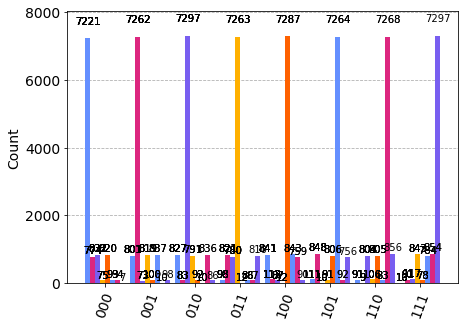

In [33]:
general_circuit = QuantumCircuit(3,3)
general_circuit.h(0)
general_circuit.cx(0, 1)
general_circuit.cx(0, 2)
general_circuit.measure([0,1,2], [0,1,2])

simulator = Aer.get_backend('aer_simulator')

t_tc = transpile(meas_calibs, simulator)
qobj = assemble(t_tc, shots=10000)
noisy_results = simulator.run(qobj, noise_model=noise_model).result()
noisy_counts = noisy_results.get_counts()
plot_histogram(noisy_counts)


#MItigate noise for the circuit with the help of noisy calibration circuit

In [34]:
#Get the fitter object
meas_fitter = meas_fitter.filter

#Results with mitigation
mitigated_results = meas_fitter.apply(noisy_results)
mitigated_counts = mitigated_results.get_counts()

#Plot noisy and mitigated results for the circuit

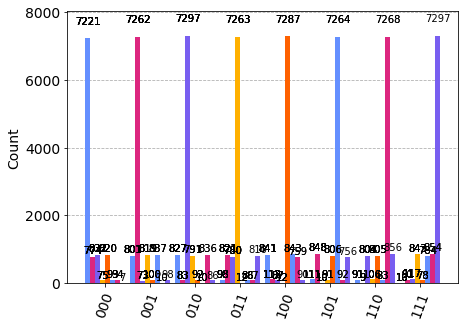

In [35]:
plot_histogram(noisy_counts)

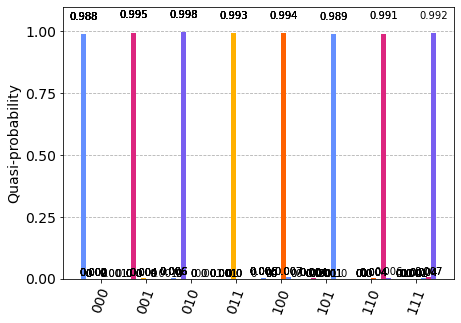

In [36]:
plot_histogram(mitigated_counts)

#Question-3

In [37]:
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.extensions import Initialize
from qiskit.ignis.verification import marginal_counts
from qiskit.quantum_info import Statevector

#Teleportation Circuit

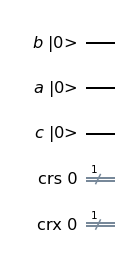

In [38]:
qr0 = QuantumRegister(1,name='b')
qr1 = QuantumRegister(1,name='a')    
qr2 = QuantumRegister(1, name='c')    

crs = ClassicalRegister(1, name="crs") 
crx = ClassicalRegister(1, name="crx")

teleportation_circuit = QuantumCircuit(qr0,qr1,qr2,crs,crx)

teleportation_circuit.draw(initial_state=True, output='mpl')

# Protocol uses 3 qubits and 2 classical bits in 2 different registers.
# Ordering of qubits in qiskit: |qubit>_c |qubit>_a |qubit>_b  =  |qubit>_2 |qubit>_1 |qubit>_0

#Initialize Alice Qubit


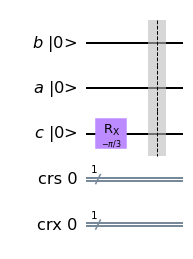

In [39]:
teleportation_circuit.rx(-np.pi/3,2)
teleportation_circuit.barrier()

teleportation_circuit.draw(initial_state=True, output='mpl')

# Initializing Alice's |qubit>_c = U|0>_c = R_x(-pi/3) |0>_c = sqrt(3)/2 |0> + i/2 |1>
# Here U = R_x(-pi/3), where - 60 degree or - pi/3 radian rotation of qubit |0>_c around x axis 
# This produces sqrt(3)/2 |0> + i/2 |1> state in the block sphere.


#Entangled Pair


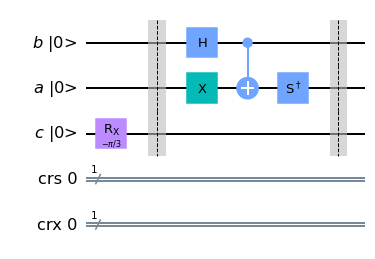

In [40]:
teleportation_circuit.h(0) # Apply h gate to bob's qubit: H_b|0>_b = (|0>_b + |1>_b)/sqrt(2)
teleportation_circuit.x(1) # Apply X gate to the alice's qubit: X_a|0>_a = |1>_a
teleportation_circuit.cx(0,1) # CNOT(b,a) (|1>_a )(|0>_b + |1>_b)/sqrt(2) = (|1>_a|0>_b + |0>_a|1>_b)/sqrt(2)
teleportation_circuit.sdg(1) # Apply Sdg gate to alice's qubit which results ( |0>_a|1>_b - i*|1>_a |0>_b ) / sqrt(2)
teleportation_circuit.barrier() 

teleportation_circuit.draw(initial_state=True, output='mpl')



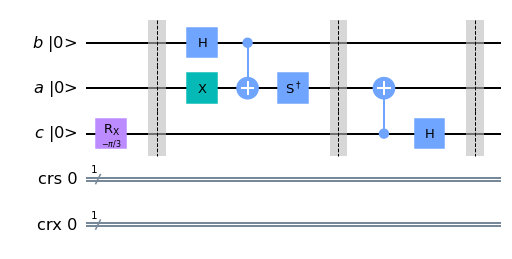

In [41]:
teleportation_circuit.cx(2,1) # Alice applies a CNOT gate to |qubit>_a, controlled by |qubit>_c
teleportation_circuit.h(2) # Then Alice applies a Hadamard gate to |qubit>_c.
teleportation_circuit.barrier()

teleportation_circuit.draw(initial_state=True, output='mpl')



#Alice Applies Measurement

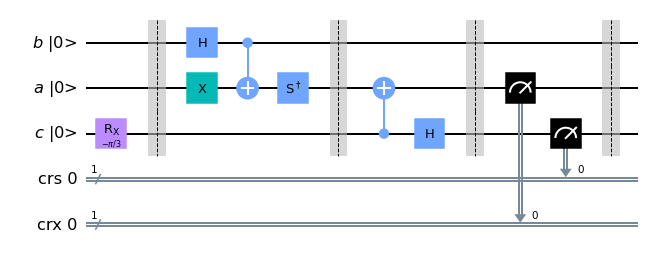

In [42]:
teleportation_circuit.measure(1,crx)
teleportation_circuit.measure(2,crs)

teleportation_circuit.barrier()

teleportation_circuit.draw(initial_state = True, output='mpl')

# Alice applies a measurement to both qubits that she owns, 
# |qubit>_c and |qubit>_a and , and stores this result in two classical bits. She then sends these two bits to Bob.

#Decoding at Bob's end

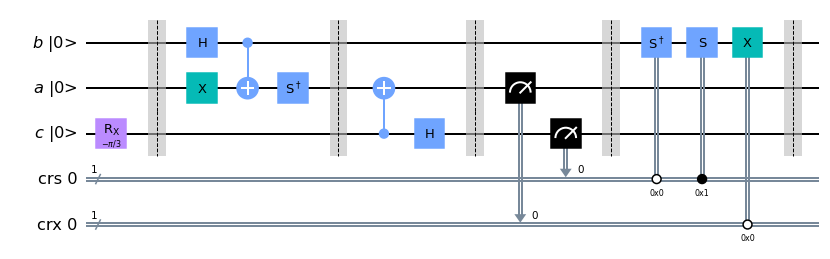

In [43]:
# Bob, who already has the |qubit>_b, then applies the following gates depending on the state of the classical bits:

# 0_c 0_a ---> Apply Sdg gate to |qubit>_b then apply X gate to |qubit>_b

# 0_c 1_a ---> Apply Sdg gate to |qubit>_b 

# 1_c 0_a ---> Apply S gate to |qubit>_b then apply X gate to |qubit>_b

# 1_c 1_a ---> Apply S gate to |qubit>_b 

teleportation_circuit.sdg(0).c_if(crs, 0) # Apply Sdg gate to |qubit>_b if 0_c occurs
teleportation_circuit.s(0).c_if(crs, 1) # Apply S gate to |qubit>_b if 1_c occurs
teleportation_circuit.x(0).c_if(crx, 0) # Apply X gate to |qubit>_b if 0_a occurs

teleportation_circuit.barrier() 

teleportation_circuit.draw(initial_state = True, output='mpl')

#Measure Bob Qubit

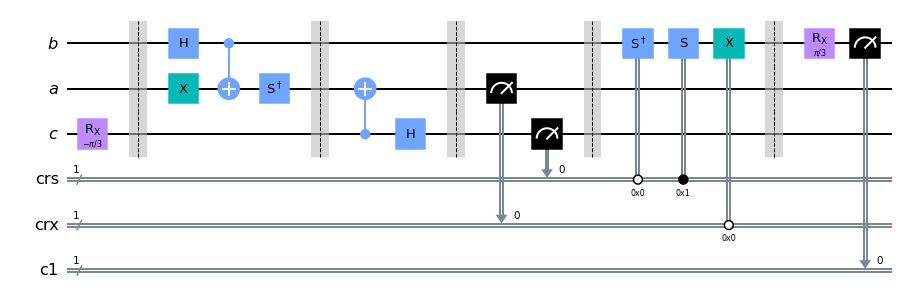

In [44]:
# Reverse the initialization process (to verify that teleportation protocol works)

teleportation_circuit.rx(+np.pi/3,0)
# Need to add a new ClassicalRegister to see the result
cr_result = ClassicalRegister(1)
teleportation_circuit.add_register(cr_result)
teleportation_circuit.measure(0,2)

teleportation_circuit.draw('mpl')

#Run on simulator

In [45]:
#select simulator
simulator = Aer.get_backend('aer_simulator')

t= transpile(teleportation_circuit, simulator)

#save statevectr
t.save_statevector()

#assemble
qobj = assemble(t)

#run
job = simulator.run(qobj)

#job monitor
job_monitor(job)

#get result
result = job.result()

Job Status: job has successfully run


#Result

In [46]:
counts = result.get_counts()
print (counts)

{'0 0 1': 273, '0 1 1': 266, '0 0 0': 239, '0 1 0': 246}


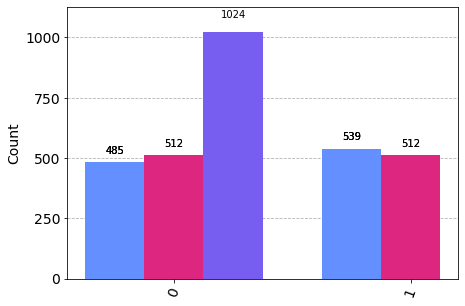

In [47]:
qubit_counts = [marginal_counts(counts, [qubit]) for qubit in range(3)]

plot_histogram(qubit_counts)

Third qubit of bob is always zero(100% of time. So we found zero in Bob's qubit everytime it is run in the simulator. The final state disentngleer is uncomputed and we got zero. Our teleportation circuit is worked.

#THE END